<a href="https://colab.research.google.com/github/pereram/Car-Price-Analysis/blob/main/Car_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas
csvFile = pandas.read_csv('/content/sample_data/california_housing_test.csv')
print(csvFile)

      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      population  households  median_income  median_house_value

In [12]:
import pandas
car_data = pandas.read_csv('/content/Car_price_cleaned.csv')
print(car_data)

     car_ID  symboling                   CarName  fueltype  aspiration  \
0         1          3        alfa-romero giulia         1           0   
1         2          3       alfa-romero stelvio         1           0   
2         3          1  alfa-romero Quadrifoglio         1           0   
3         4          2               audi 100 ls         1           0   
4         5          2                audi 100ls         1           0   
..      ...        ...                       ...       ...         ...   
200     201         -1           volvo 145e (sw)         1           0   
201     202         -1               volvo 144ea         1           1   
202     203         -1               volvo 244dl         1           0   
203     204         -1                 volvo 246         0           1   
204     205         -1               volvo 264gl         1           1   

     doornumber  carbody  drivewheel  enginelocation  wheelbase  ...  \
0             1        0           2   

In [8]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,curbweight_squared,enginesize_squared,boreratio_squared,stroke_squared,compressionratio_squared,horsepower_squared,peakrpm_squared,citympg_squared,highwaympg_squared,log_enginesize
0,1,3,alfa-romero giulia,1,0,1,0,2,0,-1.690772,...,6492304,16900,12.0409,7.1824,81.0,12321,25000000,441,729,4.875197
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,-1.690772,...,6492304,16900,12.0409,7.1824,81.0,12321,25000000,441,729,4.875197
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,-0.708596,...,7969329,23104,7.1824,12.0409,81.0,23716,25000000,361,676,5.030438
3,4,2,audi 100 ls,1,0,0,3,1,0,0.173698,...,5461569,11881,10.1761,11.5600,100.0,10404,30250000,576,900,4.700480
4,5,2,audi 100ls,1,0,0,3,0,0,0.107110,...,7974976,18496,10.1761,11.5600,64.0,13225,30250000,324,484,4.919981


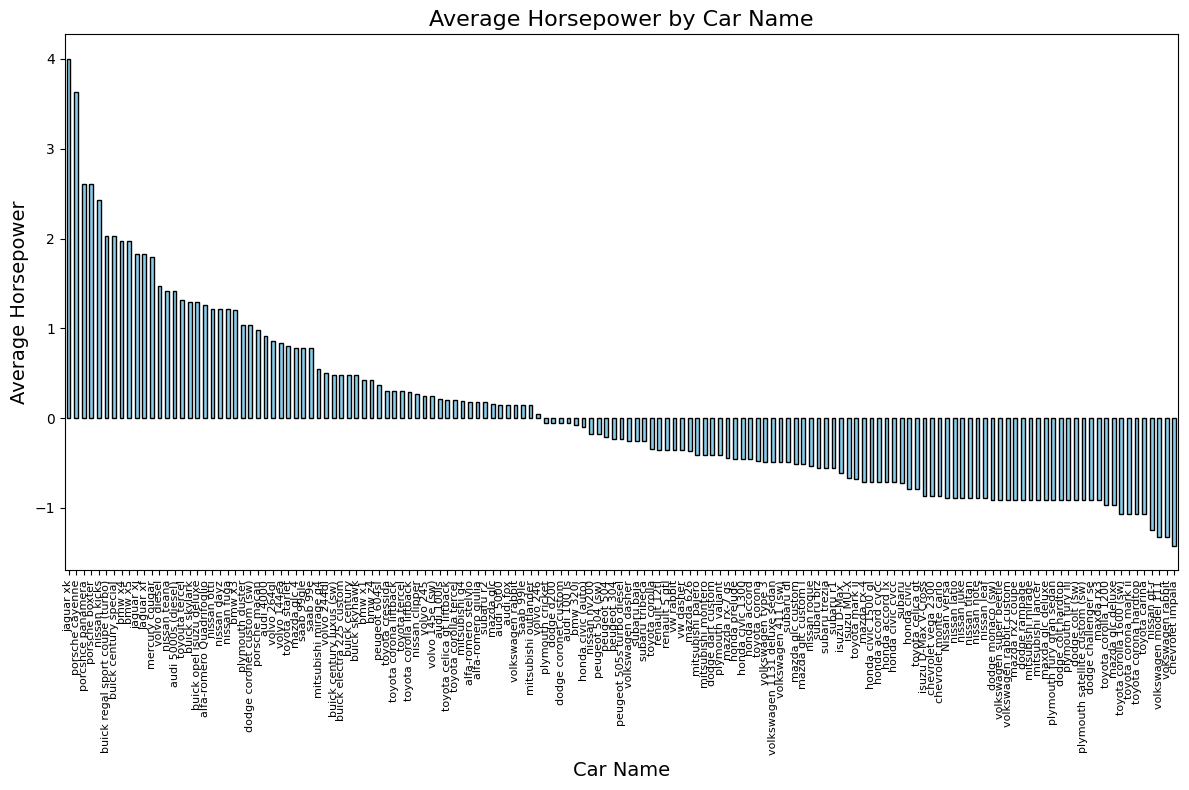

In [13]:
import matplotlib.pyplot as plt

# Grouping the data by CarName and calculating the average horsepower
car_horsepower = car_data.groupby('CarName')['horsepower'].mean().sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(12, 8))
car_horsepower.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Horsepower by Car Name', fontsize=16)
plt.xlabel('Car Name', fontsize=14)
plt.ylabel('Average Horsepower', fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()

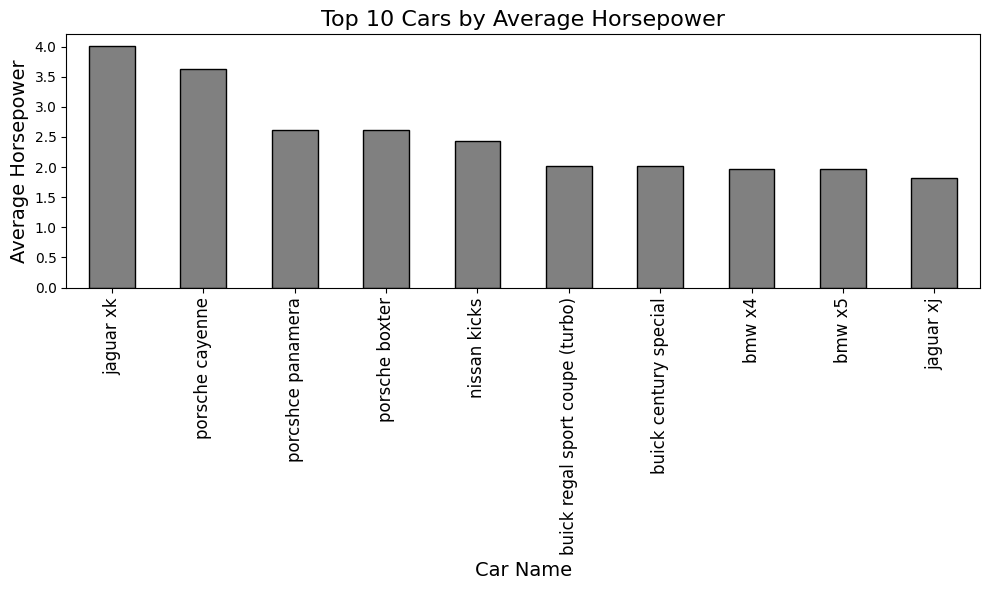

In [10]:
# Selecting the top 10 cars by average horsepower
top_10_car_horsepower = car_horsepower.head(10)

# Plotting the top 10 cars with vertical x-axis labels and gray bars
plt.figure(figsize=(10, 6))
top_10_car_horsepower.plot(kind='bar', color='gray', edgecolor='black')
plt.title('Top 10 Cars by Average Horsepower', fontsize=16)
plt.xlabel('Car Name', fontsize=14)
plt.ylabel('Average Horsepower', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

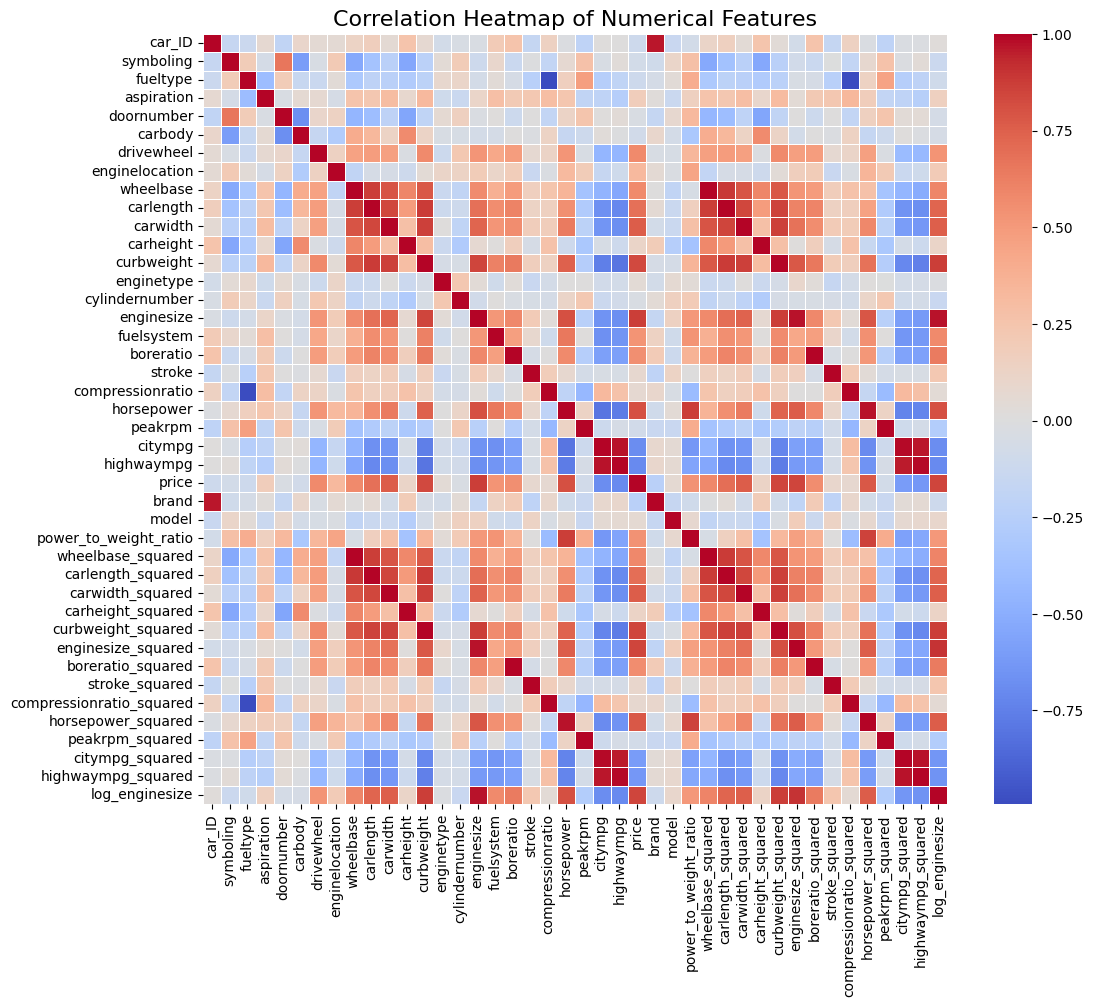

In [15]:

# Filter the dataset to include only numeric columns
numeric_data = car_data.select_dtypes(include=['number'])

# Recalculate the correlation matrix for numeric features
correlation_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

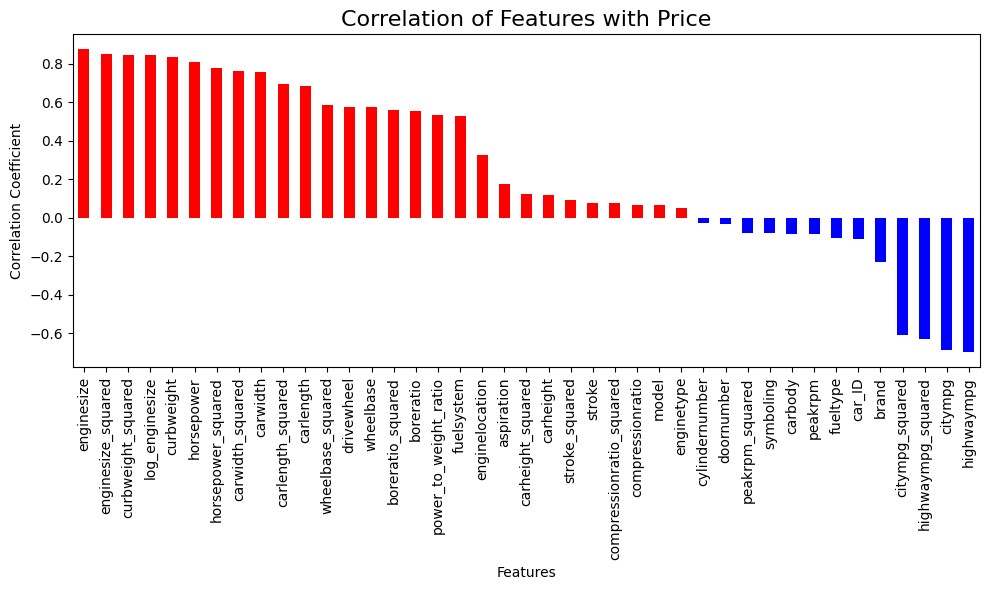

In [19]:
# Check if there is a 'carprice' or similar column in the dataset
target_column = 'price' if 'price' in numeric_data.columns else 'carprice'

if target_column in numeric_data.columns:
    # Extract correlations of 'carprice' or 'price' with other features
    carprice_correlation = correlation_matrix[target_column].sort_values(ascending=False)

    # Plot the correlations
    '''
    plt.figure(figsize=(10, 6))
    carprice_correlation.drop(target_column).plot(kind='bar')
    plt.title(f"Correlation of Features with {target_column.capitalize()}", fontsize=16)
    plt.ylabel("Correlation Coefficient")
    plt.xlabel("Features")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    '''
else:
    print("No 'carprice' or 'price' column found in the dataset.")
# Plot the correlations with updated aesthetics
plt.figure(figsize=(10, 6))

# Color bars based on correlation strength (red for positive, blue for negative)
colors = ['red' if val > 0 else 'blue' for val in carprice_correlation.drop(target_column)]

carprice_correlation.drop(target_column).plot(
    kind='bar',
    color=colors
)

plt.title(f"Correlation of Features with {target_column.capitalize()}", fontsize=16)
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.xticks(rotation=90)  # Make x-axis labels vertical
plt.tight_layout()
plt.show()





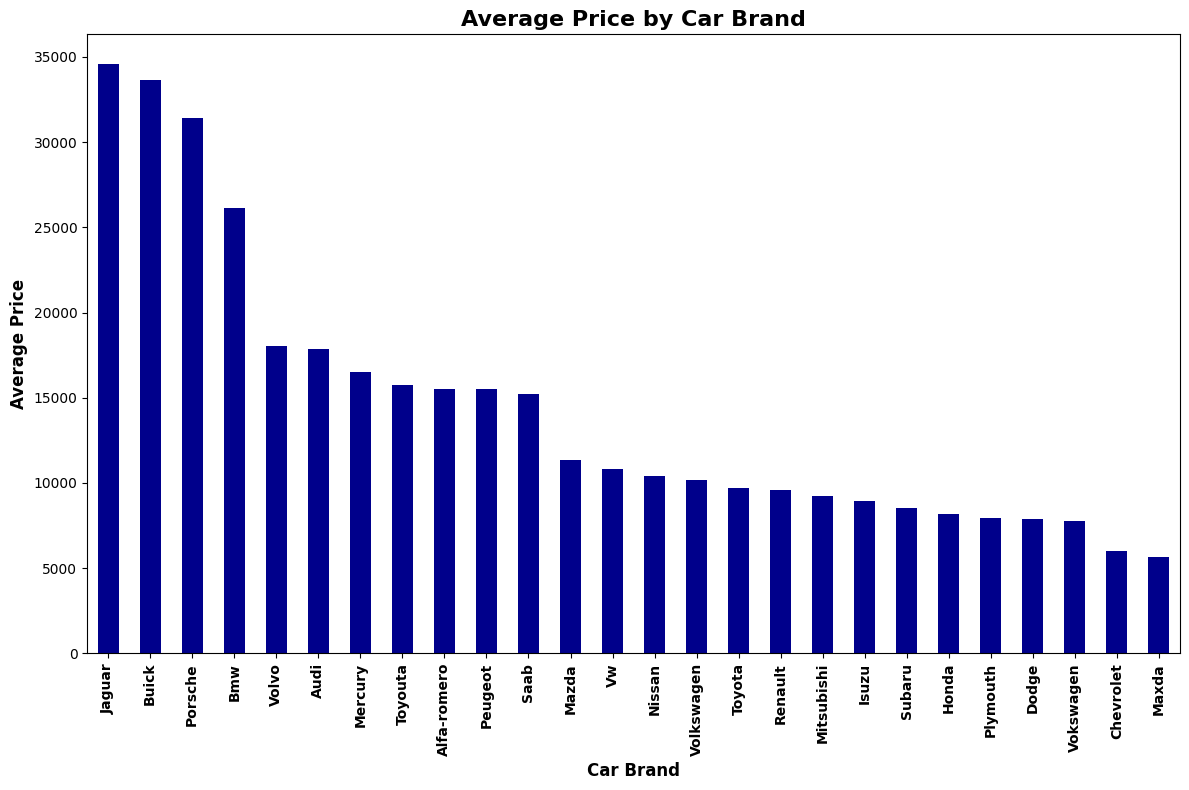

In [20]:
# Extract car brand from the 'CarName' column and clean the names
car_data['Brand'] = car_data['CarName'].str.split(' ').str[0].str.lower()
car_data['Brand'] = car_data['Brand'].replace({'porcshce': 'porsche', 'porsche': 'porsche'})

# Calculate average price for each brand (assuming 'price' column exists)
if 'price' in car_data.columns:
    brand_avg_price = car_data.groupby('Brand')['price'].mean().sort_values(ascending=False)

    # Capitalize the first letter of each brand name for consistency
    brand_avg_price.index = brand_avg_price.index.str.capitalize()

    # Plot the results
    plt.figure(figsize=(12, 8))
    brand_avg_price.plot(kind='bar', color='darkblue')

    # Add labels and title
    plt.title("Average Price by Car Brand", fontsize=16, fontweight='bold')
    plt.ylabel("Average Price", fontsize=12, fontweight='bold')
    plt.xlabel("Car Brand", fontsize=12, fontweight='bold')
    plt.xticks(rotation=90, fontsize=10, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("The 'price' column is not present in the dataset.")